In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pylab
from IPython.display import Image
from matplotlib.patches import Rectangle

Names of storages of Tiers.
'1' means Disk
'0' means Tape 

In [65]:
class Plotter:
    
    def __init__(self, trace_file_simple, trace_file_DAM):
        self.filename1 = trace_file_simple
        self.filename2 = trace_file_DAM
        self.rtype = np.dtype([('var_name', np.str, 35), ('variable', np.str, 35), ('clock', np.float32),  ('value', np.float32)])
        
        self.LINK_NAMES = []
        self.LINK_NAMES.extend(["CERN-CNAF-LHCOPN-001", "CERN-GRIDKA-LHCOPN-001",  "CERN-IN2P3-LHCOPN-001", "CERN-PIC-LHCOPN-001", "CERN-RAL-LHCOPN-001", "CERN-SARA-LHCOPN-001", "CERN-RRCK1-LHCOPN-001"])
        self.LINK_NAMES.extend(["CNAF-GRIDKA-LHCOPN-001", "GRIDKA-IN2P3-LHCOPN-001", "GRIDKA-SARA-LHCOPN-001"])
        self.TIERS= ["CERN", "CNAF", "IN2P3", "RRCKI", "PIC", "RAL", "GRIDKA", "SARA"]
   
    def links_traffic_daily(self):
    
        link_names, variable, time, traffic = np.loadtxt(self.filename1, delimiter=", ", usecols=(1, 2, 4, 6), unpack=True, dtype=self.rtype) #TRACE/trace.csv

        fig = plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
        fig.suptitle("Transferred data by link", fontsize=25)
        ax1 = fig.add_subplot(111)

        x = []

        for link in self.LINK_NAMES:
            if link == "CERN-RRCK1-LHCOPN-001":
                continue
            indexes = np.where(np.logical_and(link_names == link, variable == "traffic"))

            traffic_x = np.diff(traffic[indexes])
            traffic_x = np.insert(traffic_x, 0, traffic[indexes][0])

            days = int(time[-1] / 86400) + 1
            hist, bins = np.histogram(time[indexes], bins=range(0, (days + 1) * 86400, 86400))
            chunked = np.split(traffic_x, hist.cumsum())
            data = map(np.sum, chunked)

            x.append(np.array(data) / 10 ** 9)

        stack_coll = ax1.stackplot(range(0, days + 1), x, edgecolor="none")

        # make proxy artists
        proxy_rects = [Rectangle((0, 0), 0.1, 0.1, fc=pc.get_facecolor()[0]) for pc in stack_coll]
        # make the legend
        ax1.legend(proxy_rects, self.LINK_NAMES)


        plt.setp(ax1.get_xticklabels(), fontsize=14)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.title("")
        plt.legend(loc="best", prop={'size': 8}, shadow=True, fancybox=True)
        fig.text(0.06, 0.5, 'Transferred data, GB', ha='center', va='center', rotation='vertical', fontsize=22)
        fig.text(0.5, 0.04, 'Time, days', ha='center', va='center', fontsize=22)
    
    
    def xlinks_traffic_daily(self):
        
        fig = plt.figure(num=None, figsize=(15, 10), dpi=300, facecolor='w', edgecolor='k')
        fig.suptitle("Daily transferred data by link", fontsize=25)
    
        link_names, variable, time, traffic = np.loadtxt(self.filename1, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=self.rtype)
        link_names_DAM, variable_DAM, time_DAM, traffic_DAM = np.loadtxt(self.filename2, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=self.rtype)
        
        
        #FIRST SUBPLOT
        ax1 = fig.add_subplot(211)
        ax1.set_title("Simple", fontsize=16)
        for link in self.LINK_NAMES:
            indexes = np.where(np.logical_and(link_names == link, variable == "traffic"))
            
            days = int(time[-1] / 86400)
            hist, bins = np.histogram(time[indexes], bins=range(0, days * 86400, 86400))
            chunked = np.split(traffic[indexes], hist.cumsum())
            data = map(np.sum, chunked)
    
            ax1.plot(range(0, days), np.array(data) / 10**9, label=link)
        
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':8}, bbox_to_anchor=[0, 1], shadow=True, fancybox=True)
        
        
        #SECOND SUBPLOT
        ax2 = fig.add_subplot(212, sharex=ax1)
        ax2.set_title("DAM", fontsize=16)
        for link in self.LINK_NAMES:
            indexes = np.where(np.logical_and(link_names_DAM == link, variable_DAM == "traffic"))
            
            days_DAM = int(time_DAM[-1] / 86400)
            hist, bins = np.histogram(time_DAM[indexes], bins=range(0, days_DAM * 86400, 86400))
            chunked = np.split(traffic_DAM[indexes], hist.cumsum())
            data = map(np.sum, chunked)
            
            ax2.plot(range(0, days_DAM), np.array(data) / 10**9, label=link)
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':8}, bbox_to_anchor=[0, 0.6], shadow=True, fancybox=True, framealpha=0.9)
        
        fig.text(0.06, 0.5, 'Transferred data, GB', ha='center', va='center', rotation='vertical', fontsize=22)
        fig.text(0.5, 0.04, 'Time, days', ha='center', va='center', fontsize=22)
        
        plt.show()
    
    def links_traffic(self):
        
        fig = plt.figure(num=None, figsize=(15, 10), dpi=300, facecolor='w', edgecolor='k')
        fig.suptitle("Cumulative transferred data by link", fontsize=25)
        
        link_names, variable, time, traffic = np.loadtxt(self.filename1, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=self.rtype)
        link_names_DAM, variable_DAM, time_DAM, traffic_DAM = np.loadtxt(self.filename2, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=self.rtype)
        
        
        #FIRST SUBPLOT
        ax1 = fig.add_subplot(211)
        ax1.set_title("Simple", fontsize=16)
        for link in self.LINK_NAMES:
            indexes = np.where(np.logical_and(link_names == link, variable == "traffic"))
            ax1.plot(time[indexes] / 86400, traffic[indexes] / 10**9, label=link)
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':8}, bbox_to_anchor=[0, 1], shadow=True, fancybox=True)
        
        
        #SECOND SUBPLOT
        ax2 = fig.add_subplot(212)
        ax2.set_title("DAM", fontsize=16)
        for link in self.LINK_NAMES:
            indexes = np.where(np.logical_and(link_names_DAM == link, variable_DAM == "traffic"))
            ax2.plot(time_DAM[indexes] / 86400, traffic_DAM[indexes] / 10**9, label=link)
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':8}, bbox_to_anchor=[0, 0.6], shadow=True, fancybox=True, framealpha=0.9)
        
        fig.text(0.06, 0.5, 'Transferred data, GB', ha='center', va='center', rotation='vertical', fontsize=22)
        fig.text(0.5, 0.04, 'Time, days', ha='center', va='center', fontsize=22)
        
        plt.show()
            
    def workloadplotter(self):
        
        recordtype = np.dtype([('tier_name', np.str, 35), ('variable', np.str, 35), ('clock', np.float32),  ('value', np.float32)])
        TIERS= ["CERN", "CNAF", "IN2P3", "RRCKI", "PIC", "RAL", "GRIDKA", "SARA"]
        
        tiers_name, variable, time, number_run_core = np.loadtxt(self.filename1, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=recordtype)
        tier_name_DAM, variable_DAM, time_DAM, number_run_core_DAM = np.loadtxt(self.filename2, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=recordtype)
        plt.figure(figsize=(15,10))
        plt.title("Number of running cores at CERN", fontsize=25)
        for tier in TIERS:
            run_core_indexes = np.where(np.logical_and(tiers_name == tier, variable == "activeCore"))
            plt.plot(time[run_core_indexes] / 86400, number_run_core[run_core_indexes], label = "Simple")
            break;
        
        for tier in TIERS:
            run_core_indexes = np.where(np.logical_and(tier_name_DAM == tier, variable_DAM == "activeCore"))
            plt.plot(time_DAM[run_core_indexes] / 86400, number_run_core_DAM[run_core_indexes], label = "DAM")
            break
        plt.legend(loc="best", prop={'size':15},  shadow=True, fancybox=True)
        
        plt.xlabel('Time, days', fontsize=20)
        plt.ylabel('Number of running cores', fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        plt.show()
        
    
    def storage_plotter(self):
        
        storage_space = []
        disk_space= ["CERN1", "CNAF1", "IN2P31", "RRCKI1", "PIC1", "RAL1", "GRIDKA1", "SARA1"]
        tape_space= ["CERN0", "CNAF0", "IN2P30", "RRCKI0", "PIC0", "RAL0", "GRIDKA0", "SARA0"]
        storage_space.extend(disk_space)
        storage_space.extend(tape_space)
        
        cmap = plt.get_cmap('gnuplot')
        colors = [cmap(i) for i in np.linspace(0, 1, len(storage_space))]
        
        
        recordtype = np.dtype([('variable', np.str, 35), ('clock', np.float32),  ('value', np.float32)])
        
        st_name, time_storage, used_size = np.loadtxt(self.filename1, delimiter=", ", usecols=(2,3,6), unpack=True, dtype=recordtype)
        st_name_DAM, time_storage_DAM, used_size_DAM = np.loadtxt(self.filename2, delimiter=", ", usecols=(2,3,6), unpack=True, dtype=recordtype)
                
        fig = plt.figure(num=None, figsize=(15, 10), dpi=300, facecolor='w', edgecolor='k')
        fig.suptitle("Changing of storage space", fontsize=25)
        
        # FIRST SUBPLOT;  SIMPLE ALGORITHM, DISK SPACE
        ax1 = fig.add_subplot(221)
        ax1.set_title("Disk Space by Simple algorithm", fontsize=16)
        for i, STOR_NAME in enumerate(disk_space):
            storage_indexes = np.where(np.in1d(st_name, STOR_NAME))
            ax1.plot(time_storage[storage_indexes] / 86400, used_size[storage_indexes] / 10**12, label=STOR_NAME, color=colors[i])
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':10}, bbox_to_anchor=[0, 1], shadow=True, title="Legend", fancybox=True)
        
        # SECOND SUBPLOT; SIMPLE ALGORITHM, TAPE SPACE
        ax2 = fig.add_subplot(222)
        ax2.set_title("Tape Space by Simple algorithm", fontsize=16)
        for i, STOR_NAME in enumerate(tape_space):
            storage_indexes = np.where(np.in1d(st_name, STOR_NAME))
            ax2.plot(time_storage[storage_indexes] / 86400, used_size[storage_indexes] / 10**12, label=STOR_NAME, color=colors[i])
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':10}, bbox_to_anchor=[1, 1],  shadow=True, title="Legend", fancybox=True)
        
        # THIRD SUBPLOT; DAM ALGORITHM, DISK SPACE
        ax3 = fig.add_subplot(223, sharex=ax1)
        for i, STOR_NAME in enumerate(disk_space):
            storage_indexes = np.where(np.in1d(st_name_DAM, STOR_NAME))
            ax3.plot(np.append(time_storage_DAM[storage_indexes], time_storage[-1]) / 86400, np.append(used_size_DAM[storage_indexes], used_size_DAM[storage_indexes][-1]) / 10**12, label=STOR_NAME, color=colors[i])
        ax3.set_title("DAM DISK", fontsize=16)
        plt.setp(ax3.get_xticklabels(), fontsize=14)
        plt.setp(ax3.get_yticklabels(), fontsize=14)
        
        # FOURTH SUBPLOT; DAM ALGORITHM, TAPE SPACE
        ax4 = fig.add_subplot(224, sharex=ax1)
        for i, STOR_NAME in enumerate(tape_space):
            storage_indexes = np.where(np.in1d(st_name_DAM, STOR_NAME))
            ax4.plot(np.append(time_storage_DAM[storage_indexes], time_storage[-1]) / 86400, np.append(used_size_DAM[storage_indexes], used_size_DAM[storage_indexes][-1]) / 10**12, label=STOR_NAME, color=colors[i])
        ax4.set_title("DAM Tape", fontsize=16)
        plt.setp(ax4.get_xticklabels(), fontsize=14)
        plt.setp(ax4.get_yticklabels(), fontsize=14)
        
        fig.text(0.06, 0.5, 'Storage size, TB', ha='center', va='center', rotation='vertical', fontsize=22)
        fig.text(0.5, 0.04, 'Time, days', ha='center', va='center', fontsize=22)
        
        plt.show()
    
    def find_nearest_index(self, array, value):
        idx = (np.abs(array-value)).argmin()
        return idx


    def create_correct_array(self, dataset_amount, time_array,  end_time):
        time_interval = np.arange(0, end_time, 500)
        true_array = np.array([])
        for i in time_interval:
            index = self.find_nearest_index(time_array, i)
            true_array = np.append(true_array, dataset_amount[index])

        return true_array



    def number_of_datasets(self):
        TIERS = ["CERN", "CNAF", "IN2P3", "RRCKI", "PIC", "RAL", "GRIDKA", "SARA"]
        rtype = np.dtype([('var_name', np.str, 35), ('variable', np.str, 35), ('clock', np.float32),  ('value', np.float32)])

        tier_names, variable, timex, number_dset = np.loadtxt(self.filename1, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=rtype)
        tier_names_DAM, variable_DAM, timex_DAM, number_dset_DAM = np.loadtxt(self.filename2, delimiter=", ", usecols=(1,2,3,6), unpack=True, dtype=rtype)

        fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
        fig.suptitle("Number of datasets", fontsize=25)

        # FIRST SUBPLOT;  SIMPLE ALGORITHM, DISK SPACE
        cm = plt.get_cmap('gnuplot')
        ax1 = fig.add_subplot(221)
        ax1.set_title("Dataset number on disk space by simple algorithm", fontsize=16)
        ax1.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])
        x = []

        time_interval = np.arange(0, timex[-1], 500)

        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names == tier, variable == "datasetOnDisk"))
            true_dataset_amount = self.create_correct_array(number_dset[indexes], timex[indexes], timex[-1])
            x.append(true_dataset_amount)
        stack_1 = ax1.stackplot(time_interval / 86400, x, edgecolor='none')
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':10}, bbox_to_anchor=[0, 1], shadow=True, title="Legend", fancybox=True)

        # SECOND SUBPLOT; SIMPLE ALGORITHM, TAPE SPACE
        x = []
        ax2 = fig.add_subplot(222)
        ax2.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])
        ax2.set_title("Dataset number on tape by simple algorithm", fontsize=16)
        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names == tier, variable == "datasetOnTape"))
            true_dataset_amount = self.create_correct_array(number_dset[indexes], timex[indexes], timex[-1])
            x.append(true_dataset_amount)
        ax2.stackplot(time_interval / 86400, x, edgecolor='none')
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size':10}, bbox_to_anchor=[1, 1],  shadow=True, title="Legend", fancybox=True)

        # THIRD SUBPLOT; DAM ALGORITHM, DISK SPACE
        time_interval = np.arange(0, timex_DAM[-1], 500)
        x = []
        ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
        ax3.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])

        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names_DAM == tier, variable_DAM == "datasetOnDisk"))
            true_dataset_amount = self.create_correct_array(number_dset_DAM[indexes], timex_DAM[indexes], timex_DAM[-1])
            x.append(true_dataset_amount)

        ax3.stackplot(time_interval / 86400, x, edgecolor='none')
        ax3.set_title("Dataset number on disk by DAM algorithm", fontsize=16)
        plt.setp(ax3.get_xticklabels(), fontsize=14)
        plt.setp(ax3.get_yticklabels(), fontsize=14)

        # FOURTH SUBPLOT; DAM ALGORITHM, TAPE SPACE
        x = []
        ax4 = fig.add_subplot(224, sharex=ax2, sharey=ax2)
        ax4.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])
        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names_DAM == tier, variable_DAM == "datasetOnTape"))
            true_dataset_amount = self.create_correct_array(number_dset_DAM[indexes], timex_DAM[indexes], timex_DAM[-1])
            x.append(true_dataset_amount)
        ax4.stackplot(time_interval / 86400, x, edgecolor='none')
        ax4.set_title("Dataset number on tape by DAM algorithm", fontsize=16)
        plt.setp(ax4.get_xticklabels(), fontsize=14)
        plt.setp(ax4.get_yticklabels(), fontsize=14)

        fig.text(0.06, 0.5, 'Number of datasets', ha='center', va='center', rotation='vertical', fontsize=22)
        fig.text(0.5, 0.04, 'Time, days', ha='center', va='center', fontsize=22)
        fig.legend(stack_1, TIERS, 'upper right')


    def cumulative_input_and_output_per_site(self):
        TIERS = ["CERN", "CNAF", "IN2P3", "RRCKI", "PIC", "RAL", "GRIDKA", "SARA"]
        rtype = np.dtype([('var_name', np.str, 35), ('variable', np.str, 35), ('clock', np.float32), ('value', np.float32)])

        tier_names, variable, timex, traffic = np.loadtxt(self.filename1, delimiter=", ", usecols=(1, 2, 3, 6), unpack=True,
                                                              dtype=rtype)
        tier_names_DAM, variable_DAM, timex_DAM, traffic_DAM = np.loadtxt(self.filename2, delimiter=", ",
                                                                              usecols=(1, 2, 3, 6), unpack=True,
                                                                              dtype=rtype)

        fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
        fig.suptitle("Cumulative input and output traffic per site", fontsize=25)

        # FIRST SUBPLOT;  SIMPLE ALGORITHM, DISK SPACE
        cm = plt.get_cmap('inferno')
        ax1 = fig.add_subplot(221)
        ax1.set_title("Input by simple algorithm", fontsize=16)
        ax1.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])
        x = []

        time_interval = np.arange(0, timex[-1], 500)

        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names == tier, variable == "inputData"))
            true_dataset_amount = self.create_correct_array(traffic[indexes], timex[indexes], timex[-1]) / 10**12
            x.append(true_dataset_amount)
        stack_1 = ax1.stackplot(time_interval / 86400, x, edgecolor='none')
        plt.setp(ax1.get_xticklabels(), fontsize=14)
        plt.setp(ax1.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size': 10}, bbox_to_anchor=[0, 1], shadow=True, title="Legend", fancybox=True)

        # SECOND SUBPLOT; SIMPLE ALGORITHM, TAPE SPACE
        x = []
        ax2 = fig.add_subplot(222)
        ax2.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])
        ax2.set_title("Output simple algorithm", fontsize=16)
        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names == tier, variable == "outputData"))
            true_dataset_amount = self.create_correct_array(traffic[indexes], timex[indexes], timex[-1]) / 10**12
            x.append(true_dataset_amount)
        ax2.stackplot(time_interval / 86400, x, edgecolor='none')
        plt.setp(ax2.get_xticklabels(), fontsize=14)
        plt.setp(ax2.get_yticklabels(), fontsize=14)
        plt.legend(loc="best", prop={'size': 10}, bbox_to_anchor=[1, 1], shadow=True, title="Legend", fancybox=True)

        # THIRD SUBPLOT; DAM ALGORITHM, DISK SPACE
        time_interval = np.arange(0, timex_DAM[-1], 500)
        x = []
        ax3 = fig.add_subplot(223, sharex=ax1, sharey=ax1)
        ax3.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])

        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names_DAM == tier, variable_DAM == "inputData"))
            true_dataset_amount = self.create_correct_array(traffic_DAM[indexes], timex_DAM[indexes], timex_DAM[-1]) / 10**12
            x.append(true_dataset_amount)

        ax3.stackplot(time_interval / 86400, x, edgecolor='none')
        ax3.set_title("Input by DAM algorithm", fontsize=16)
        plt.setp(ax3.get_xticklabels(), fontsize=14)
        plt.setp(ax3.get_yticklabels(), fontsize=14)

        # FOURTH SUBPLOT; DAM ALGORITHM, TAPE SPACE
        x = []
        ax4 = fig.add_subplot(224, sharex=ax2, sharey=ax2)
        ax4.set_color_cycle([cm(1. * i / len(TIERS)) for i in range(len(TIERS))])
        for i, tier in enumerate(TIERS):
            indexes = np.where(np.logical_and(tier_names_DAM == tier, variable_DAM == "outputData"))
            true_dataset_amount = self.create_correct_array(traffic_DAM[indexes], timex_DAM[indexes], timex_DAM[-1]) / 10**12
            x.append(true_dataset_amount)
        ax4.stackplot(time_interval / 86400, x, edgecolor='none')
        ax4.set_title("Output by DAM algorithm", fontsize=16)
        plt.setp(ax4.get_xticklabels(), fontsize=14)
        plt.setp(ax4.get_yticklabels(), fontsize=14)

        fig.text(0.06, 0.5, 'Traffic, TB', ha='center', va='center', rotation='vertical', fontsize=22)
        fig.text(0.5, 0.04, 'Time, days', ha='center', va='center', fontsize=22)
        fig.legend(stack_1, TIERS, 'upper right')

In [62]:
class TimeAnalysis:
    
    def __init__(self, filename1, filename2):
        
        self.filename1 = filename1
        self.filename2 = filename2
        
    def plot_hist_time_exec_1_job(self):
        time_start, time_sched, time_start_exec, time_end_exec = np.loadtxt(self.filename1, skiprows=1,  delimiter=",", usecols=(2,3,4,5), unpack=True)
        true_time = time_end_exec - time_sched

        time_start_DAM, time_sched_DAM, time_start_exec_DAM, time_end_exec_DAM = np.loadtxt(self.filename2, skiprows=1,  delimiter=",", usecols=(2,3,4,5), unpack=True)
        true_time_DAM = time_end_exec_DAM - time_sched_DAM

        fig = plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
        fig.suptitle("Time execution of ONE job", fontsize=16)
        
        ax1 = fig.add_subplot(111)
        ax1.hist(true_time / 86400, bins=500, label="Simple", edgecolor="none", alpha=0.5)

        ax1.hist(true_time_DAM / 86400, bins=500, label="DAM", edgecolor="none", alpha=0.5)
        ax1.set_xlabel('Time, sec', fontsize=14)
        ax1.legend()
        fig.autofmt_xdate()
        plt.show()

    def hist_time_shed(self):
        time_submission, time_sched= np.loadtxt(self.filename1, skiprows=1,  delimiter=",", usecols=(2,3), unpack=True)
        time_submission_DAM, time_sched_DAM= np.loadtxt(self.filename2, skiprows=1,  delimiter=",", usecols=(2,3), unpack=True)

        fig = plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
        
        ax1 = fig.add_subplot(111)
        fig.suptitle("Time scheduling of ONE job", fontsize=16)
        ax1.hist((time_sched - time_submission) / 86400, bins=500, edgecolor="none", alpha=0.5, label="Simple")

        ax1.hist((time_sched_DAM - time_submission_DAM) / 86400, bins=500, edgecolor="none", alpha=0.5, label="DAM")
        ax1.set_xlabel('Time, sec', fontsize=14)
        ax1.set_ylim([0, 300])
        ax1.set_xlim([0, max((time_sched_DAM[-1] - time_submission_DAM[-1]), (time_sched[-1] - time_submission[-1]))/86400])
        ax1.legend()
        plt.show()


    # 1 - idle time
    def work_time(self):
        TIERS = ["CERN", "CNAF", "GRIDKA", "IN2P3", "PIC", "RAL", "SARA", "RRCKI"]
        CPU = [5100, 2808, 2440, 2300, 949, 4680, 1708, 1640]
        locs = np.arange(1, len(TIERS)+1)
        width = 0.27

        rtype = np.dtype([('clocks1', np.float32), ('clocks', np.float32), ('clocke', np.float32), ('tier', np.str, 8)])
        time_shed, time_start_exec, time_end_exec, tiers= np.loadtxt(self.filename1, skiprows=1,  delimiter=",", usecols=(3,4,5,6), unpack=True, dtype=rtype)
        time_shed_DAM, time_start_exec_DAM, time_end_exec_DAM, tiers_DAM= np.loadtxt(self.filename2, skiprows=1,  delimiter=",", usecols=(3,4,5,6), unpack=True, dtype=rtype)

        data = []
        data_DAM = []

        fig = plt.figure(num=None, figsize=(10, 8), dpi=100, facecolor='w', edgecolor='b')
        ax1 = fig.add_subplot(111)

        for i, tier in enumerate(TIERS):
            indexes = np.where(tiers == tier)
            data.append((np.sum(time_end_exec[indexes] - time_start_exec[indexes]) / time_end_exec[-1]) / (CPU[i] / 100))

        for i, tier in enumerate(TIERS):
            indexes = np.where(tiers_DAM == tier)
            data_DAM.append((np.sum(time_end_exec_DAM[indexes] - time_start_exec_DAM[indexes]) / time_end_exec_DAM[-1]) / (CPU[i] / 100))

        ax1.bar(locs, data, width=width, label="Simple")
        ax1.bar(locs+width, data_DAM, width=width, color='red', label="DAM")
        plt.xticks(locs + width*1.5, TIERS)
        ax1.legend()
        fig.autofmt_xdate()
        plt.title("1 - idle time")
        plt.show()
    
    def executed_tasks(self):
        
        plt.figure(figsize=(10,7))
        time_start, time_sched, time_start_exec, time_end_exec = np.loadtxt(self.filename1, skiprows=1,  delimiter=",", usecols=(2,3,4,5), unpack=True)
        time_start1, time_sched1, time_start_exec1, time_end_exec1 = np.loadtxt(self.filename2, skiprows=1,  delimiter=",", usecols=(2,3,4,5), unpack=True)
        
        plt.title("Time of execution of job", fontsize=25)
        plt.plot(np.sort(time_end_exec)/86400, range(len(time_end_exec)), lw=2, color='y', label='Simple')
        plt.plot(np.sort(time_end_exec1)/86400, range(len(time_end_exec1)), color='k', lw=2, label='DAM')
        plt.legend(loc="best", prop={'size':15},  shadow=True, fancybox=True)
        plt.xlabel('Time, days', fontsize=20)
        plt.ylabel('Number of executed jobs', fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

    def scheduled_tasks(self):
        
        plt.figure(figsize=(10,7))
        time_start, time_sched, time_start_exec, time_end_exec = np.loadtxt(self.filename1, skiprows=1,  delimiter=",", usecols=(2,3,4,5), unpack=True)
        time_start1, time_sched1, time_start_exec1, time_end_exec1 = np.loadtxt(self.filename2, skiprows=1,  delimiter=",", usecols=(2,3,4,5), unpack=True)

        plt.title("Time of scheduling of job", fontsize=25)
        plt.plot(np.sort(time_sched)/86400, range(len(time_sched)), color='y', lw=2, label='Simple')
        plt.plot(np.sort(time_sched1)/86400,range(len(time_sched1)), color='k', lw=2, label='DAM')
        plt.legend(loc="best", prop={'size':15},  shadow=True, fancybox=True)
        plt.xlabel('Time, days', fontsize=20)
        plt.ylabel('Number of scheduled jobs', fontsize=20)
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)

In [38]:
path = "/home/ken/ClionProjects/simgridoutput/7replica-nonrem/"

In [66]:
plotter = Plotter(path + "trace.csv", path + "trace_DAM.csv")

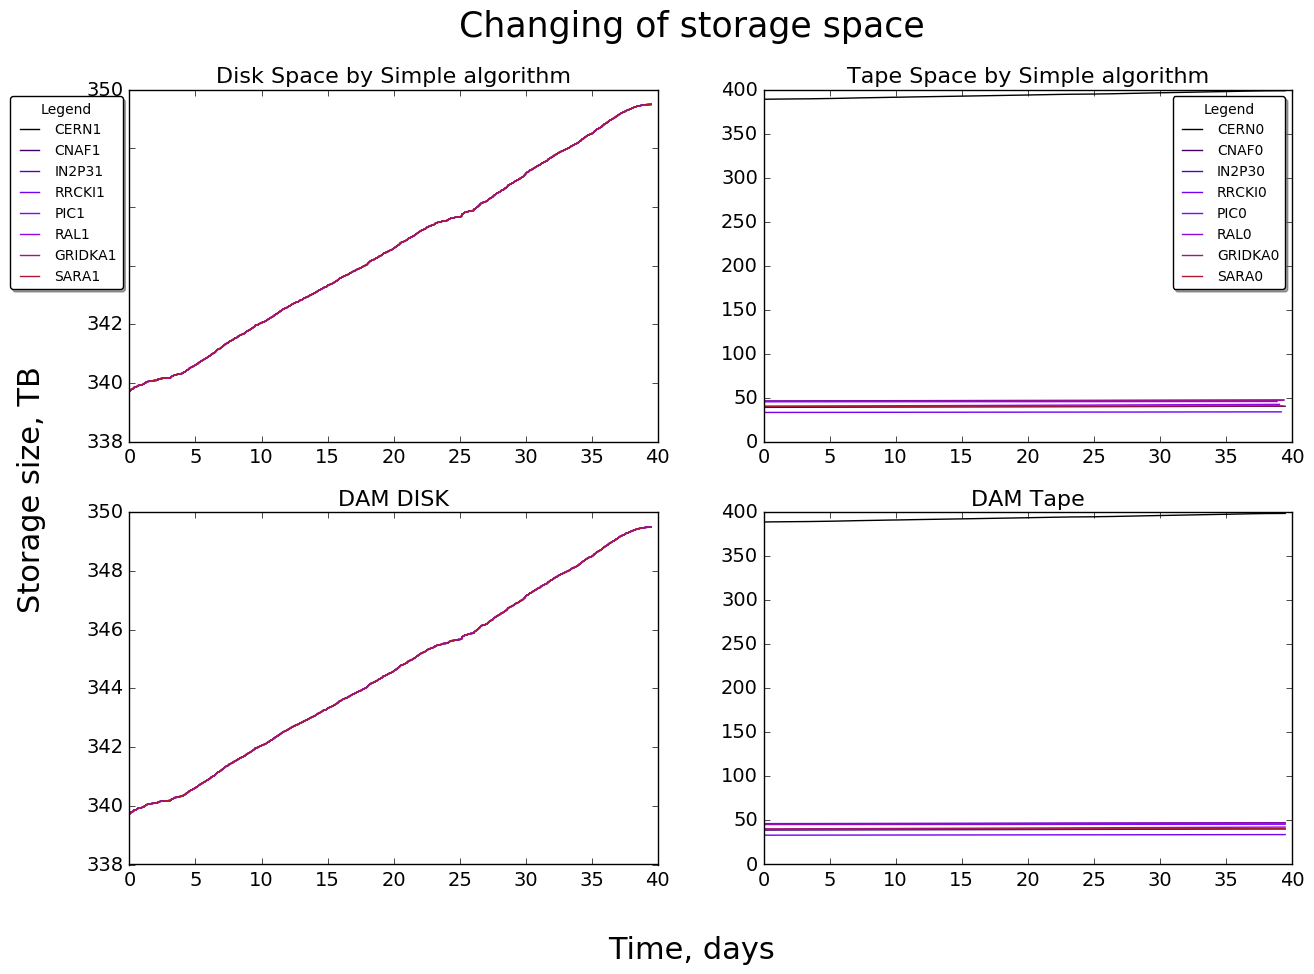

In [40]:
plotter.storage_plotter()

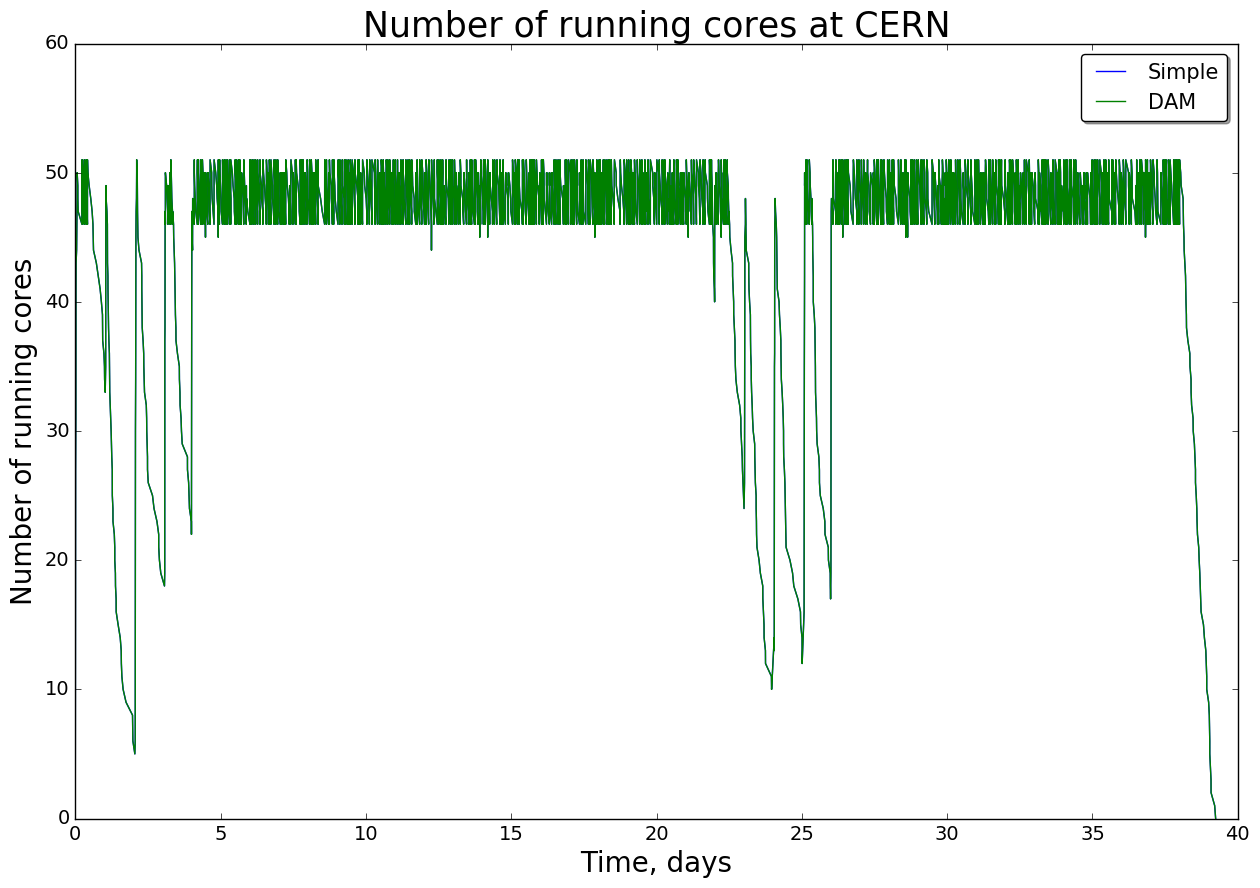

In [67]:
plotter.workloadplotter()

The similar pattern is observed at other tiers.

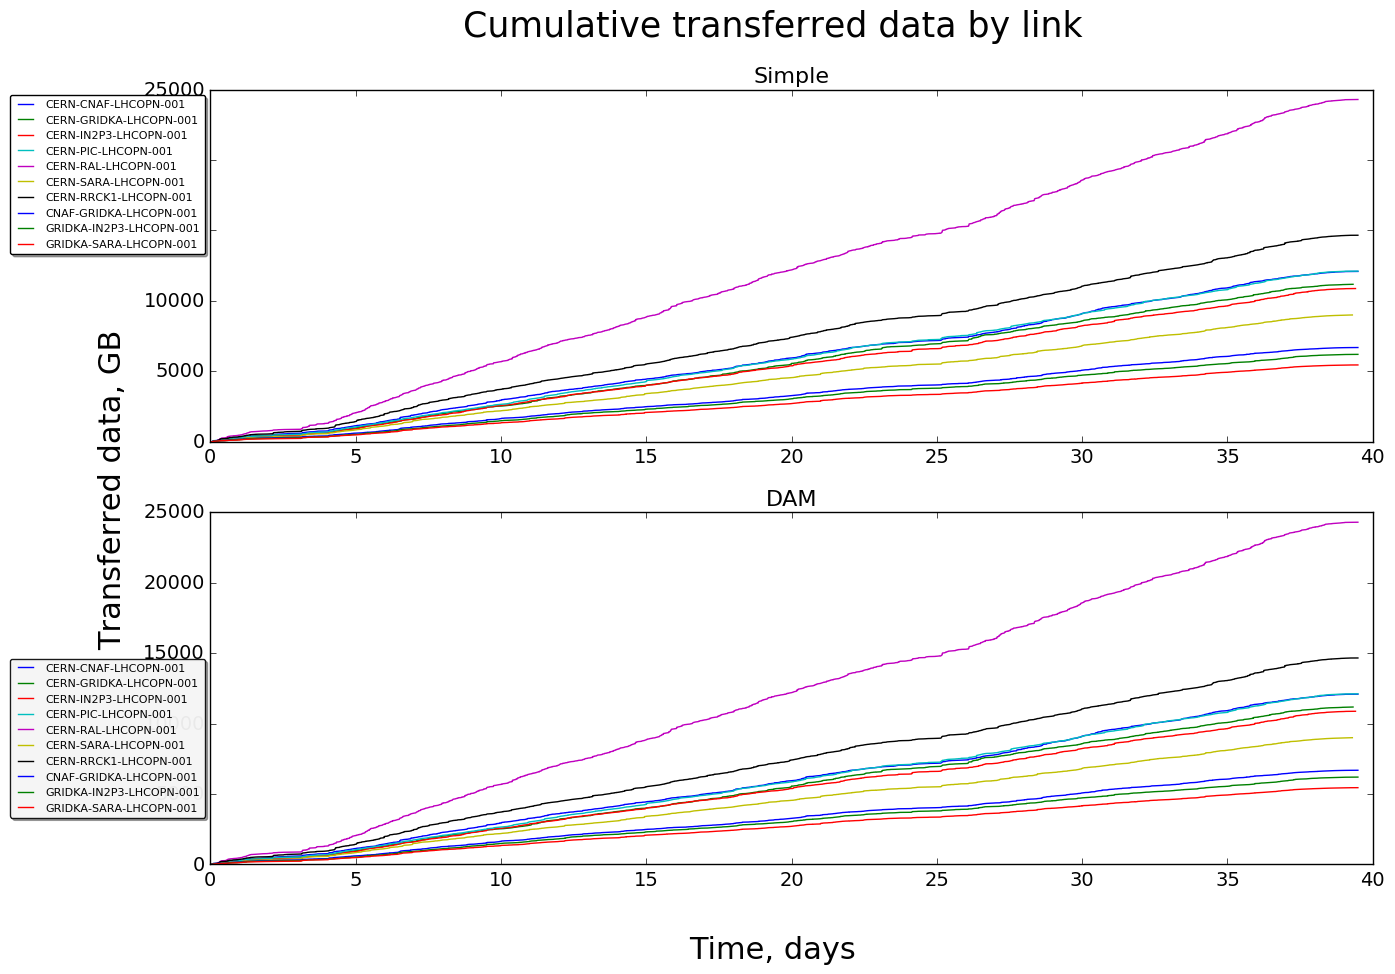

In [43]:
plotter.links_traffic()

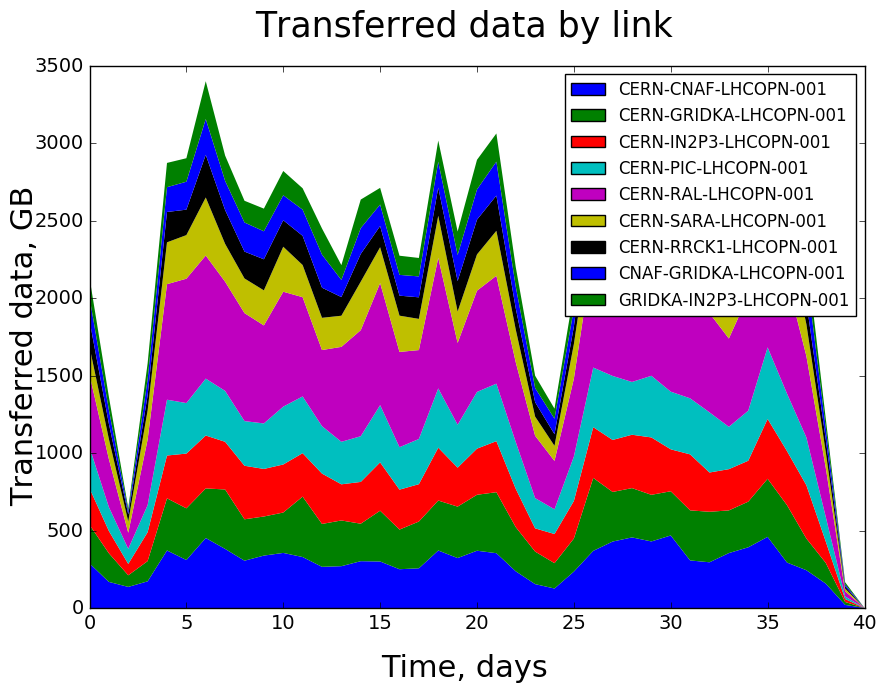

In [44]:
plotter.links_traffic_daily()

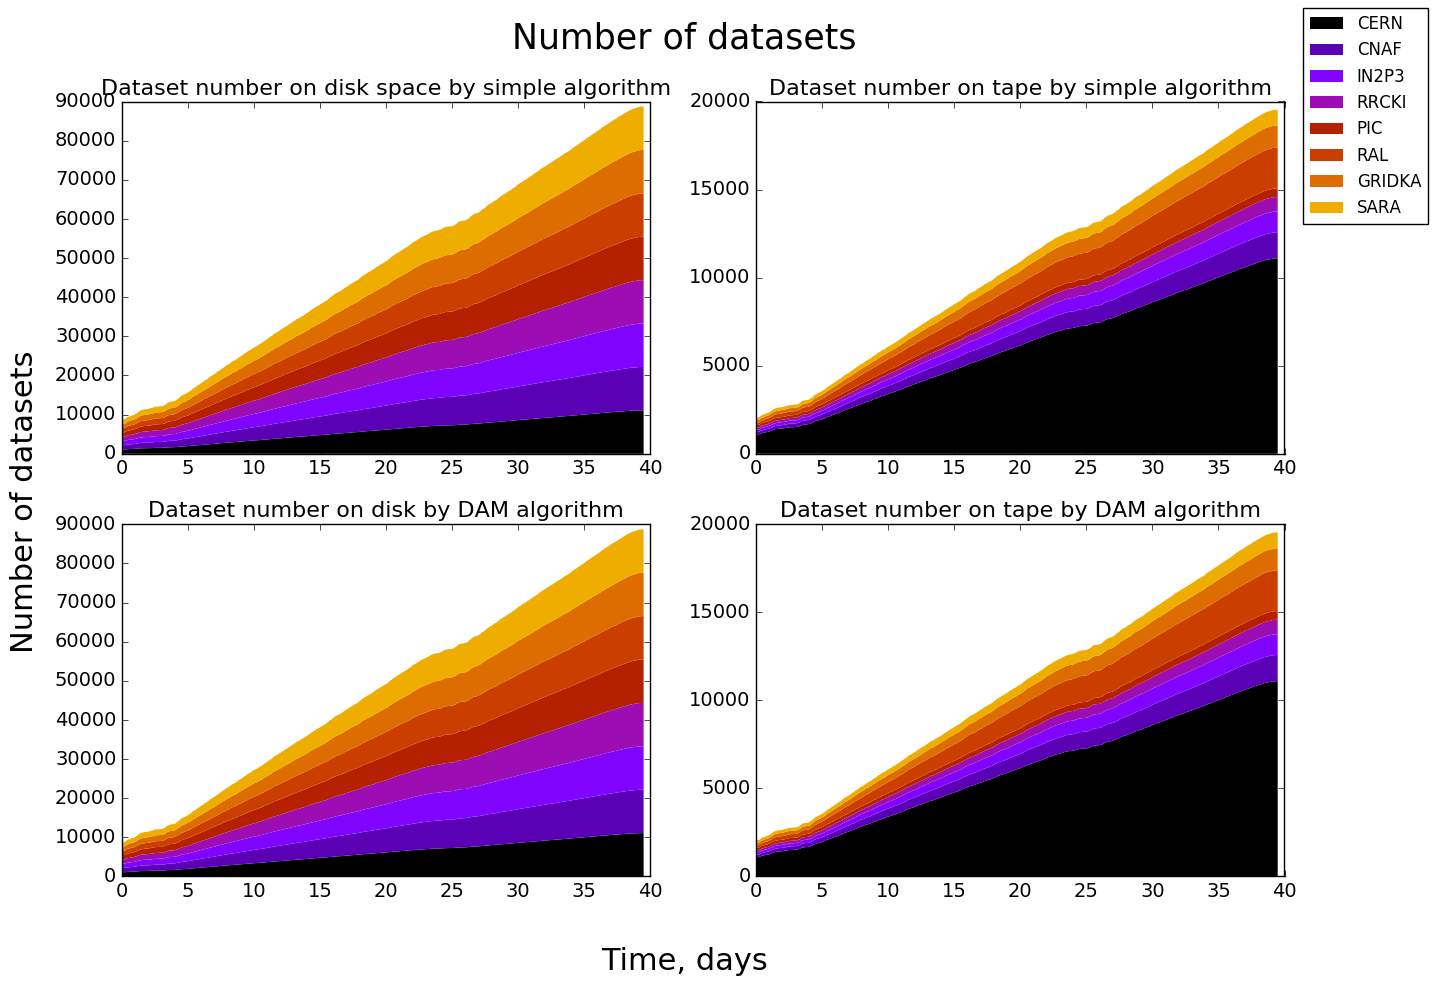

In [57]:
plotter.number_of_datasets()

На графике выше пока ничего не интересного не происходит, т.к не предусмотрен механизм удаления "непопулярных" файлов.

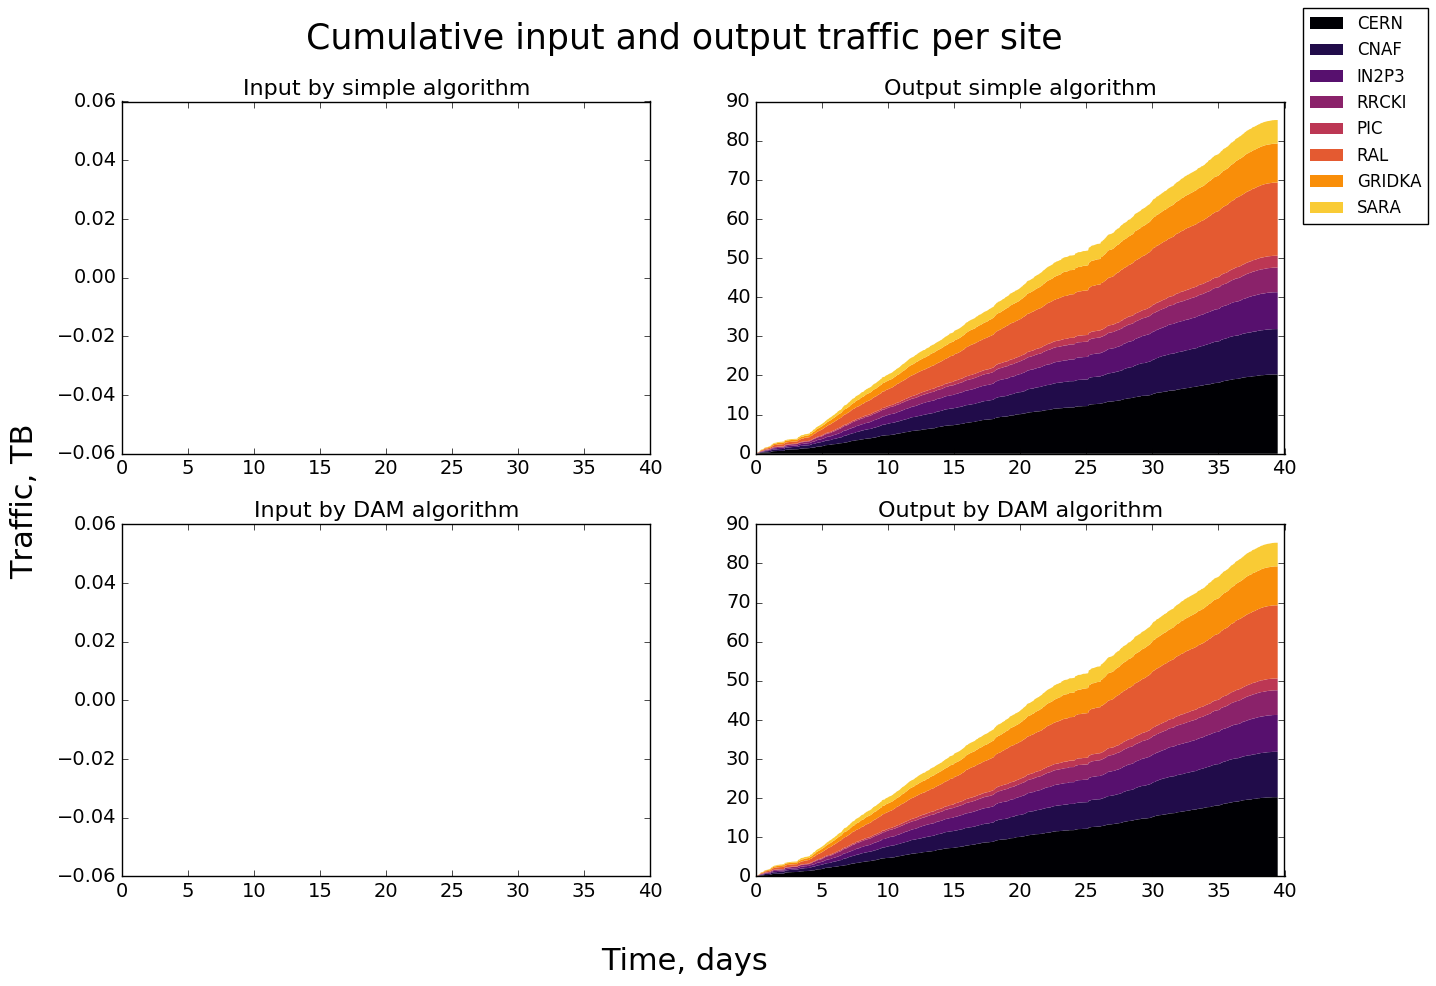

In [58]:
plotter.cumulative_input_and_output_per_site()

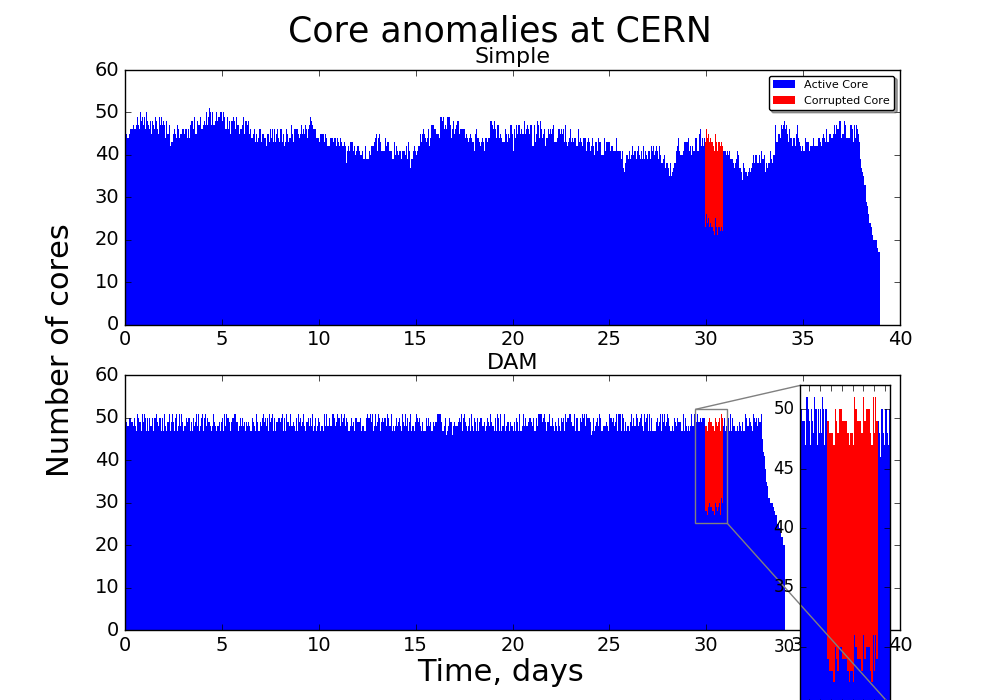

In [3]:
Image(filename="/home/ken/zoomed_anom.png")

In [63]:
time_analysis = TimeAnalysis("/home/ken/ClionProjects/simgridoutput/7replica-nonrem/out.txt", "/home/ken/ClionProjects/simgridoutput/7replica-nonrem/out_DAM.txt")

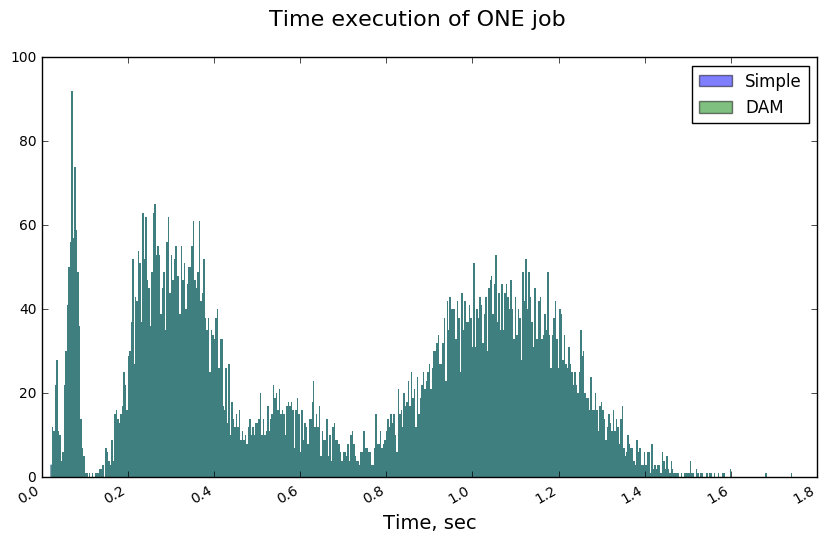

In [64]:
time_analysis.plot_hist_time_exec_1_job()

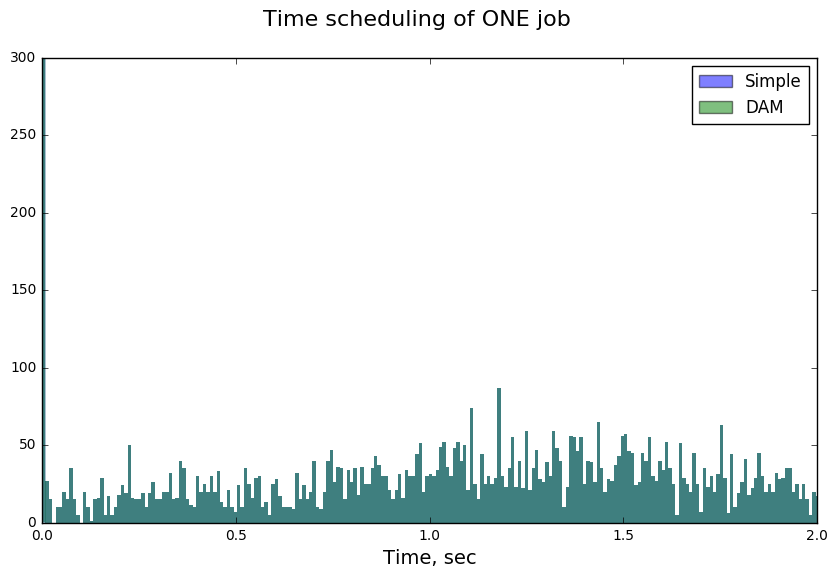

In [61]:
time_analysis.hist_time_shed()

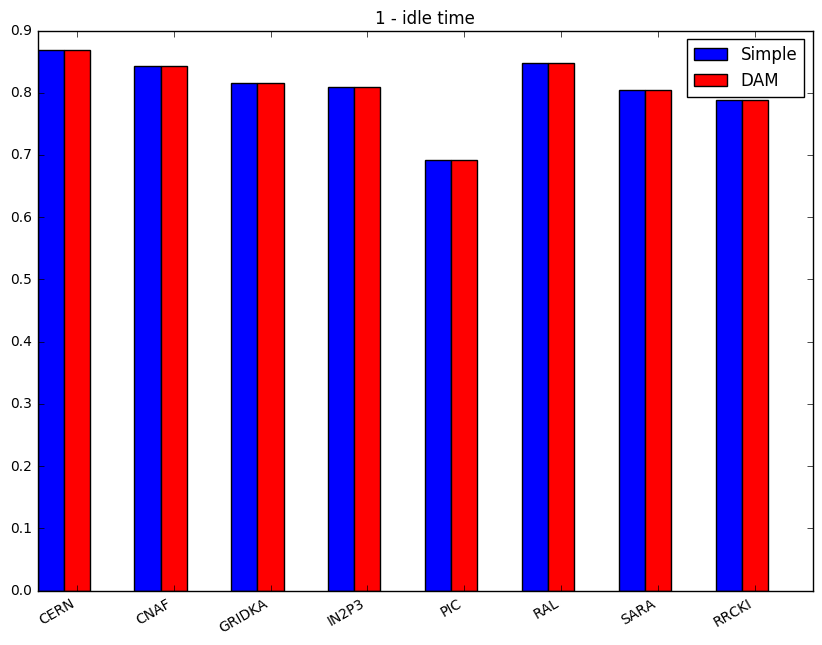

In [54]:
time_analysis.work_time()

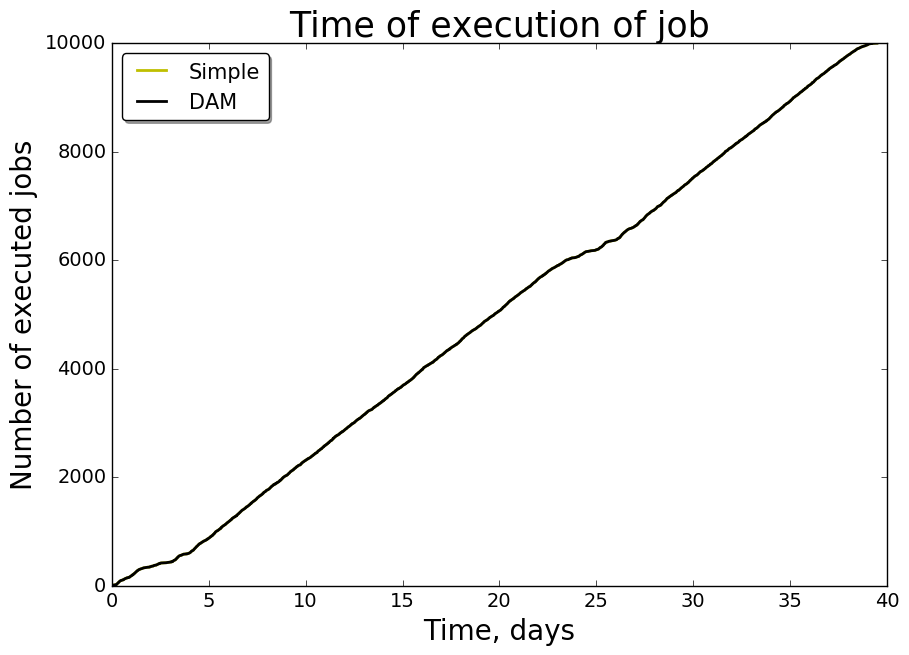

In [55]:
time_analysis.executed_tasks()

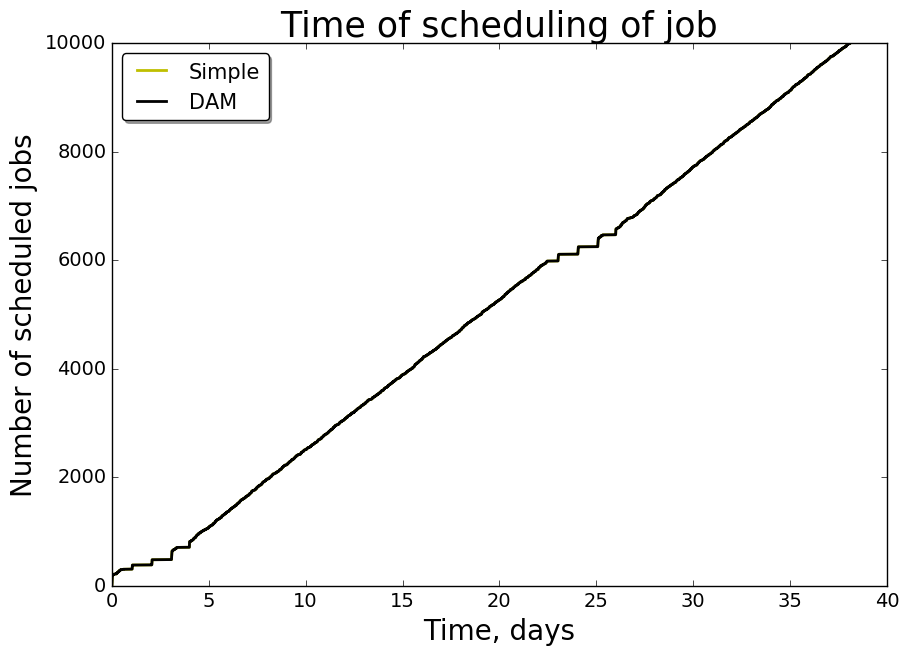

In [56]:
time_analysis.scheduled_tasks()